In [3]:
!pip install pandas

  Using cached pandas-2.2.3-cp310-cp310-manylinux2014_aarch64.manylinux_2_17_aarch64.whl.metadata (89 kB)
  Using cached numpy-2.2.5-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (63 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 2.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]


In [4]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [5]:

import requests
import pandas as pd
import matplotlib.pyplot as plt

API_BASE     = "http://api:8000/api"
RFMS_ENDPOINT = f"{API_BASE}/rfm_segments/"

# Fetch all RFM rows
resp = requests.get(RFMS_ENDPOINT)
resp.raise_for_status()

# Build DataFrame
df_rfm = pd.DataFrame(resp.json())

# Convert date_created back to datetime
df_rfm['date_created'] = pd.to_datetime(df_rfm['date_created'])

df_rfm.head()


,mobile_id,recency_days,frequency,monetary,R_score,F_score,M_score,RFM_score,segment,rfm_id,date_created
0,0526265d-2633-43c0-9ae0-74716f5b24a9,11,3,190.79,5,1,2,512,Recent Customers,1,2025-05-03 21:44:34.349812+00:00
1,06fb811e-8e3b-4a89-9ec8-a5b53038a721,79,1,191.28,1,3,2,132,Others,2,2025-05-03 21:44:34.358101+00:00
2,090d4f8e-6f7c-40e0-9b5c-124ed86333de,58,2,182.24,2,1,2,212,Others,3,2025-05-03 21:44:34.366117+00:00
3,0b00add8-5671-4af4-800f-dd8e710c1dcb,5,2,306.76,5,1,1,511,Recent Customers,4,2025-05-03 21:44:34.370704+00:00
4,0bd2e48d-b344-4a4d-9f77-3d0e1684e625,18,1,65.39,4,3,4,434,Recent Customers,5,2025-05-03 21:44:34.375336+00:00


In [6]:
print(df_rfm['segment'].value_counts())

segment
Others              35
Frequent Buyers     34
Recent Customers    31
Name: count, dtype: int64


<Axes: >

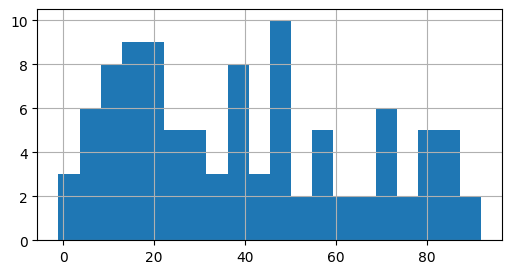

In [7]:
df_rfm['recency_days'].hist(bins=20, figsize=(6,3))

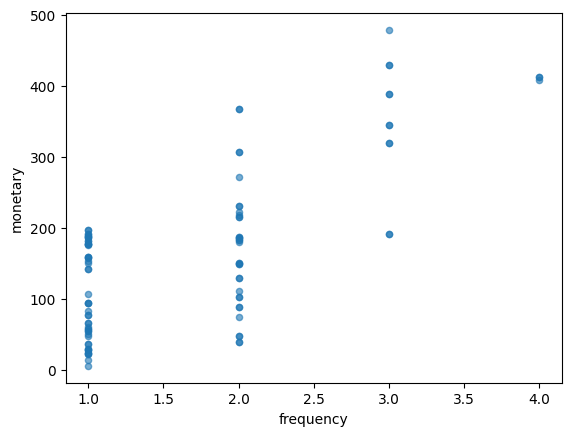

In [8]:
df_rfm.plot.scatter(x='frequency', y='monetary', alpha=0.6);

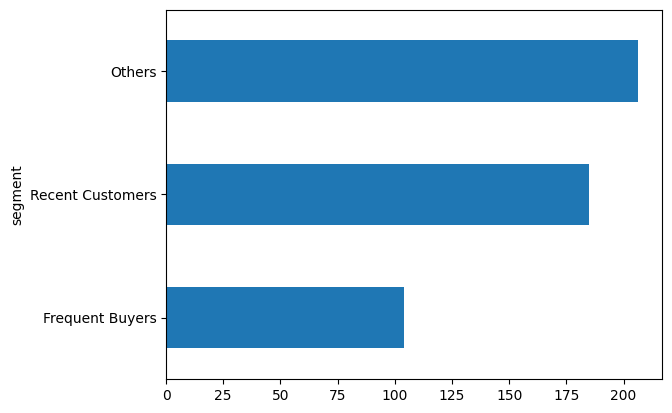

In [10]:
df_rfm.groupby('segment')['monetary'].mean().sort_values().plot.barh();

In [9]:

# Load RFM dataset
df = df_rfm.copy()

# Group by segment and compute mean metrics
segment_profile = (
    df.groupby("segment")[["recency_days", "frequency", "monetary"]]
    .agg(["mean", "median", "count"])
    .round(2)
    .sort_values(("monetary", "mean"), ascending=False)
)

print("📊 Segment Profiles:")
print(segment_profile)

📊 Segment Profiles:
                 recency_days              frequency              monetary  \
                         mean median count      mean median count     mean   
segment                                                                      
Others                  53.37   49.0    35      1.94    2.0    35   206.47   
Recent Customers        14.45   14.0    31      2.03    2.0    31   184.85   
Frequent Buyers         48.65   48.0    34      1.00    1.0    34   104.18   

                                
                  median count  
segment                         
Others            188.84    35  
Recent Customers  184.85    31  
Frequent Buyers    99.64    34  
